In [83]:
import numpy as np
import pandas as pd
from pyBibX.base import pbx_probe
from tabulate import tabulate
from prettytable import PrettyTable
import bibtexparser

In [ ]:
# Prepare bibfile for analysis
csv_file_path = 'bib-Files-raw\scopusref02.csv' # csv downloaded from scopus with doi and references
bib_file_path = 'bib-Files-raw\scopus02.bib' # bib file downloaded from scopus with all options
ouput_file_path = 'bib-Files\scopus_updated02.bib'

# Load the CSV file and cleaup csv
csv_data = pd.read_csv(csv_file_path, encoding='utf-8')
csv_data['DOI'] = csv_data['DOI'].astype(str)
csv_data['References'] = csv_data['References'].astype(str)
csv_data['DOI'] = csv_data['DOI'].str.strip().str.lower()

with open(bib_file_path, 'r', encoding='utf-8') as bib_file:
    bib_database = bibtexparser.load(bib_file)

# Create a dictionary of existing BibTeX entries by DOI (lowercased)
doi_to_entry = {entry.get('doi', '').lower(): entry for entry in bib_database.entries}

for _, row in csv_data.iterrows():
    doi = str(row['DOI'])
    reference_text = row['References'].strip()

    # Skip if DOI is missing
    if doi not in doi_to_entry:
        entry['references'] = ''
        continue

    # Get the corresponding BibTeX entry
    entry = doi_to_entry[doi]

    # Append the reference text
    entry['references'] = reference_text


with open(ouput_file_path, 'w', encoding='utf-8') as output_bib_file:
    bibtexparser.dump(bib_database, output_bib_file)

<>:2: SyntaxWarning:

invalid escape sequence '\s'

<>:3: SyntaxWarning:

invalid escape sequence '\s'

<>:4: SyntaxWarning:

invalid escape sequence '\s'

<>:2: SyntaxWarning:

invalid escape sequence '\s'

<>:3: SyntaxWarning:

invalid escape sequence '\s'

<>:4: SyntaxWarning:

invalid escape sequence '\s'

C:\Users\bicic\AppData\Local\Temp\ipykernel_18484\3136424919.py:2: SyntaxWarning:

invalid escape sequence '\s'

C:\Users\bicic\AppData\Local\Temp\ipykernel_18484\3136424919.py:3: SyntaxWarning:

invalid escape sequence '\s'

C:\Users\bicic\AppData\Local\Temp\ipykernel_18484\3136424919.py:4: SyntaxWarning:

invalid escape sequence '\s'



In [ ]:
# Load bib file
# Arguments for pbx_probe: file_bib = 'filename.bib'; db = 'scopus', 'wos', 'pubmed'; del_duplicated = True, False
# Note: the other arguments lead to an key error for some reason
file_path = './bib-Files/scopus_updated02.bib'
database = 'scopus'
bibfile = pbx_probe(file_bib = file_path)

IndexError: string index out of range

In [30]:
# Generic report
report = bibfile.eda_bib()


In [31]:
#bibfile.data is the dataframe with the content
print(tabulate(bibfile.data.head(n = 10), headers = 'keys', tablefmt = 'psql'))

+----+--------------------------------------------------------------------------------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
# Check Docs IDs
print(tabulate(bibfile.table_id_doc, headers = 'keys', tablefmt = 'psql'))

+-----+------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|     |   ID | Document                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [ ]:
#DocIDs per Type
print(tabulate(bibfile.id_doc_types(), headers = 'keys', tablefmt = 'psql'))

+----+-------------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
# Check authors
print(tabulate(bibfile.table_id_aut, headers='keys', tablefmt='psql'))

+------+--------+--------------------------------------+
|      | ID     | Author                               |
|------+--------+--------------------------------------|
|    0 | a_0    | abbas, mazhar                        |
|    1 | a_1    | abdelhakim, mohamed                  |
|    2 | a_2    | abdul-samad, zulkiflee               |
|    3 | a_3    | abdulla, aysha ebrahim               |
|    4 | a_4    | abrisham, sepehr                     |
|    5 | a_5    | abu-alsondos, ibrahim a.             |
|    6 | a_6    | adams, samantha a.                   |
|    7 | a_7    | adeola, ogechi                       |
|    8 | a_8    | adisa, isaiah                        |
|    9 | a_9    | agherdien, nuraan                    |
|   10 | a_10   | agrawal, rajat                       |
|   11 | a_11   | agrawal, somya                       |
|   12 | a_12   | aguinis, herman                      |
|   13 | a_13   | ahire, sanjay l.                     |
|   14 | a_14   | ahmad, farhan

In [ ]:
# Check sources/journals
print(tabulate(bibfile.table_id_jou, headers='keys', tablefmt='psql'))

+-----+-------+----------------------------------------------------------------------------------------------------------------------------+
|     | ID    | Source                                                                                                                     |
|-----+-------+----------------------------------------------------------------------------------------------------------------------------|
|   0 | j_0   | sustainability                                                                                                             |
|   1 | j_1   | manag. prof.                                                                                                               |
|   2 | j_2   | int. j. proj. manage.                                                                                                      |
|   3 | j_3   | int j inf manage                                                                                                           |
|   4 | j_4  

In [ ]:
# Check institutions
print(tabulate(bibfile.table_id_uni, headers='keys', tablefmt='psql'))

# Note: maybe there is an option to import institution on scopus

+-----+-------+--------------------------------------------------------------------------------------------------------------+
|     | ID    | Institution                                                                                                  |
|-----+-------+--------------------------------------------------------------------------------------------------------------|
|   0 | i_0   | innovation and continuous improvement technologies research centre (incite)                                  |
|   1 | i_1   | university of wales trinity saint david                                                                      |
|   2 | i_2   | coventry university                                                                                          |
|   3 | i_3   | center for research in architecture                                                                          |
|   4 | i_4   | lumsa university                                                                               

In [ ]:
# Check countries
print(tabulate(bibfile.table_id_ctr, headers='keys', tablefmt='psql'))

+----+------+--------------------------+
|    | ID   | Country                  |
|----+------+--------------------------|
|  0 | c_0  | Hong Kong                |
|  1 | c_1  | Taiwan                   |
|  2 | c_2  | Bangladesh               |
|  3 | c_3  | Iran                     |
|  4 | c_4  | Italy                    |
|  5 | c_5  | Sri Lanka                |
|  6 | c_6  | Tunisia                  |
|  7 | c_7  | Pakistan                 |
|  8 | c_8  | Denmark                  |
|  9 | c_9  | Turkey                   |
| 10 | c_10 | Jordan                   |
| 11 | c_11 | Macao                    |
| 12 | c_12 | Germany                  |
| 13 | c_13 | Cyprus                   |
| 14 | c_14 | Canada                   |
| 15 | c_15 | Bahrain                  |
| 16 | c_16 | Sweden                   |
| 17 | c_17 | Croatia                  |
| 18 | c_18 | Austria                  |
| 19 | c_19 | Belgium                  |
| 20 | c_20 | South Africa             |
| 21 | c_21 | Is

In [ ]:
# check authors keyword (kwa)
print(tabulate(bibfile.table_id_kwa, headers='keys', tablefmt='psql'))

+------+--------+------------------------------------------------------------------------------------------------------------------------------+
|      | ID     | KWA                                                                                                                          |
|------+--------+------------------------------------------------------------------------------------------------------------------------------|
|    0 | k_0    | trust                                                                                                                        |
|    1 | k_1    | knowledge management                                                                                                         |
|    2 | k_2    | knowledge sharing                                                                                                            |
|    3 | k_3    | innovation                                                                                                      

In [ ]:
# check keyword plus IDs
print(tabulate(bibfile.table_id_kwp, headers='keys', tablefmt='psql'))

+------+--------+------------------------------------------------------+
|      | ID     | KWP                                                  |
|------+--------+------------------------------------------------------|
|    0 | p_0    | knowledge management                                 |
|    1 | p_1    | project management                                   |
|    2 | p_2    | information systems                                  |
|    3 | p_3    | trust                                                |
|    4 | p_4    | article                                              |
|    5 | p_5    | leadership                                           |
|    6 | p_6    | human                                                |
|    7 | p_7    | decision making                                      |
|    8 | p_8    | workplace                                            |
|    9 | p_9    | success factors                                      |
|   10 | p_10   | societies and institutions       

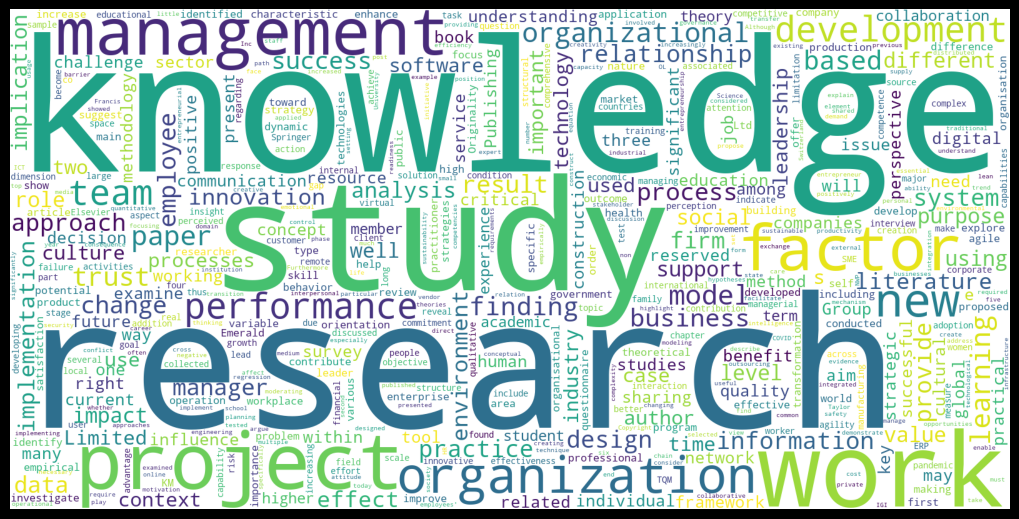

In [ ]:
# Wordcloud from abstracts
bibfile.word_cloud_plot(entry='abs')

In [ ]:
# Sorting words in abstracts by importance
table             = PrettyTable()
data_wd           = bibfile.ask_gpt_wd
table.field_names = ['Word', 'Importance']
for key, value in data_wd.items():
    table.add_row([key, round(value, 4)])
print(table)

+------------------+------------+
|       Word       | Importance |
+------------------+------------+
|    knowledge     |    1.0     |
|     research     |   0.9851   |
|      study       |   0.9303   |
|       work       |   0.9204   |
|     project      |   0.8831   |
|    management    |   0.8706   |
|      factor      |   0.796    |
|   organization   |   0.7836   |
|       new        |   0.694    |
|   performance    |   0.6144   |
|       team       |   0.5995   |
|   development    |   0.592    |
|  organizational  |   0.5846   |
|      paper       |   0.5796   |
|     learning     |   0.5771   |
|      model       |   0.5771   |
|      based       |   0.5299   |
|      trust       |   0.5249   |
|     finding      |   0.5025   |
|     business     |   0.4826   |
|     success      |   0.4701   |
|     employee     |   0.4602   |
|     process      |   0.4577   |
|      result      |   0.4478   |
|      change      |   0.4403   |
|      system      |   0.4129   |
|      design 

In [39]:
# N-Grams
# Arguments: view       = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            entry      = 'abs', 'title', 'kwa', or 'kwp'
#            n_grams    = An integer with size n (representing the most common groups of words with size n)
#            stop_words = A list of stopwords to clean the corpus. ['ar', 'bn', 'bg', 'cs', 'en', 'fi', 'fr', 'de', 'el', 'hi', 'he', 'hu', 'it', 'ja', 'ko',  'mr', 'fa', 'pl', 'pt-br', 'ro', 'ru', 'es', 'sv', 'sk', 'zh', 'th', 'uk'];
#                         'ar' = Arabic; 'bn' = Bengali; 'bg' = Bulgarian; 'cs' = Czech; 'en' = English; 'fi' = Finnish; 'fr' = French; 'de' = German; 'el' = Greek; 'he' = Hebrew;'hi' = Hindi; 'hu' = Hungarian; 'it' = Italian;
#                         'ja' = Japanese; 'ko' = Korean; 'mr' =  Marathi; 'fa' =  Persian; 'pl' =  Polish; 'pt-br' = Portuguese-Brazilian; 'ro' = Romanian; 'ru' = Russian; 'es' =  Spanish; 'sk' = Slovak; 'sv' = Swedish;
#                         'zh' = Chinese; 'th' = Thai; 'uk' = Ukrainian
#            rmv_custom_words  = A list of custom stopwords to clean the corpus
#             wordsn           = Number of N-Grams
bibfile.get_top_ngrams(view = 'notebook', entry = 'kwp', ngrams = 1, stop_words = ['en'], rmv_custom_words = [], wordsn = 15)

In [80]:
bibfile.get_top_ngrams(view = 'notebook', entry = 'abs', ngrams = 2, stop_words = ['en'], rmv_custom_words = ['reserved', 'case', 'emerald', 'methodology', 'publishing', 'paper', 'taylor', 'springer', 'igi'], wordsn = 15)

In [81]:
bibfile.get_top_ngrams(view = 'notebook', entry = 'kwa', ngrams = 2, stop_words = ['en'], rmv_custom_words = [], wordsn = 15)

In [ ]:
# table of the most common n-grams
data_ng = bibfile.ask_gpt_ng
print(data_ng)

                               Word  Freq
0         human resource management     9
1        societies and institutions     9
2    management information systems     6
3       design methodology approach     6
4          total quality management     6
5           knowledge based systems     6
6           critical success factor     6
7      structural equation modeling     5
8          social networking online     4
9   management knowledge management     4
10   information system development     4
11         management united states     4
12                offshore oil well     3
13              oil well production     3
14    resource management knowledge     3


In [47]:
# Documents Projection based on Words. (An interactive plot). It returns the Projection (each document coordinate) and the Labels (each document cluster)
# Arguments: view              = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            corpus_type       = 'abs', 'title', 'kwa', or 'kwp';
#            stop_words        = A list of stopwords to clean the corpus. ['ar', 'bn', 'bg', 'cs', 'en', 'fi', 'fr', 'de', 'el', 'hi', 'he', 'hu', 'it', 'ja', 'ko',  'mr', 'fa', 'pl', 'pt-br', 'ro', 'ru', 'es', 'sv', 'sk', 'zh', 'th', 'uk'];
#                                'ar' = Arabic; 'bn' = Bengali; 'bg' = Bulgarian; 'cs' = Czech; 'en' = English; 'fi' = Finnish; 'fr' = French; 'de' = German; 'el' = Greek; 'he' = Hebrew;'hi' = Hindi; 'hu' = Hungarian; 'it' = Italian;
#                                'ja' = Japanese; 'ko' = Korean; 'mr' =  Marathi; 'fa' =  Persian; 'pl' =  Polish; 'pt-br' = Potuguese-Brazilian; 'ro' = Romanian; 'ru' = Russian; 'es' =  Spanish; 'sk' = Slovak; 'sv' = Swedish;
#                                'zh' = Chinese; 'th' = Thai; 'uk' = Ukrainian
#            rmv_custom_words  = A list of custom stopwords to clean the corpus;
#            custom_label      = A list of custom labels for each document. The user can define each document cluster;
#            custom_projection = A list of custom coordinates for each document. The user can define each document coordinate;
#            n_components      = Number of Dimensions;
#            n_clusters        = Number of Clusters;
#            tf_idf            = True or False (True -> The Cluster Algorithm will use the DTM to calculate each document Label. False -> The Cluster Algorithm will use the Coordinates to calculate each document Label)
#            embeddings        = True or False (True -> The Cluster Algorithm will use the Word Embeddings to calculate each document Label. False -> The Cluster Algorithm will use the Coordinates to calculate each document Label)
#            method            = 'tsvd' or 'umap' ('tsvd' -> Truncated SVD projection method is used. 'umap' -> UMAP projection method is used)
projection, labels = bibfile.docs_projection(view              = 'notebook',
                                             corpus_type       = 'abs',
                                             stop_words        = ['en'],
                                             rmv_custom_words  = [],
                                             custom_label      = [],
                                             custom_projection = [],
                                             n_components      = 9,
                                             n_clusters        = 2,
                                             tf_idf            = False,
                                             embeddings        = False,
                                             method            = 'umap')

In [48]:
# table of the above
data_pr = pd.DataFrame(np.hstack([projection, labels.reshape(-1,1)]))
print(tabulate(data_pr, headers = 'keys', tablefmt = 'psql'))

+-----+----------+-------------+---------+---------+---------+---------+---------+---------+---------+-----+
|     |        0 |           1 |       2 |       3 |       4 |       5 |       6 |       7 |       8 |   9 |
|-----+----------+-------------+---------+---------+---------+---------+---------+---------+---------+-----|
|   0 | 0.829893 |  3.09571    | 7.00858 | 5.78877 | 6.4514  | 5.28553 | 4.42645 | 4.74892 | 3.85273 |   0 |
|   1 | 1.16478  |  3.31752    | 7.11719 | 5.72664 | 6.21198 | 5.45907 | 4.79592 | 4.56473 | 3.98634 |   0 |
|   2 | 1.00089  |  3.32153    | 7.59126 | 5.26514 | 7.38503 | 4.78238 | 6.62726 | 4.65031 | 4.85436 |   0 |
|   3 | 1.03112  |  3.25184    | 7.54484 | 6.23552 | 6.74089 | 5.07828 | 5.91399 | 5.68256 | 4.63607 |   0 |
|   4 | 0.884772 |  3.01029    | 7.11964 | 6.53405 | 6.91256 | 5.18871 | 4.79946 | 5.20597 | 3.94889 |   0 |
|   5 | 1.53595  |  3.0897     | 6.90012 | 5.69316 | 7.24673 | 5.35335 | 6.44055 | 4.01021 | 4.7346  |   0 |
|   6 | 1.10141  | 

In [54]:
# Arguments: view              = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            key               = 'abs', 'title', 'jou, 'kwa', or 'kwp';
#            stop_words        = A list of stopwords to clean the corpus. ['ar', 'bn', 'bg', 'cs', 'en', 'fi', 'fr', 'de', 'el', 'hi', 'he', 'hu', 'it', 'ja', 'ko',  'mr', 'fa', 'pl', 'pt-br', 'ro', 'ru', 'es', 'sv', 'sk', 'zh', 'th', 'uk'];
#                                'ar' = Arabic; 'bn' = Bengali; 'bg' = Bulgarian; 'cs' = Czech; 'en' = English; 'fi' = Finnish; 'fr' = French; 'de' = German; 'el' = Greek; 'he' = Hebrew;'hi' = Hindi; 'hu' = Hungarian; 'it' = Italian;
#                                'ja' = Japanese; 'ko' = Korean; 'mr' =  Marathi; 'fa' =  Persian; 'pl' =  Polish; 'pt-br' = Potuguese-Brazilian; 'ro' = Romanian; 'ru' = Russian; 'es' =  Spanish; 'sk' = Slovak; 'sv' = Swedish;
#                                'zh' = Chinese; 'th' = Thai; 'uk' = Ukrainian
#            rmv_custom_words  = A list of custom stopwords to clean the corpus;
#            topn              = Total number entities;
#            txt_font_size     = Font size of the text inside the bins;
#            start             = Start Year; -1 = all years
#            end               = End Year;   -1 = all years
bibfile.plot_evolution_year(view             = 'notebook',
                            stop_words       = ['en'],
                            rmv_custom_words = [],
                            key              = 'kwa',
                            topn             = 3,
                            txt_font_size    = 12,
                            start            = 2010,
                            end              = 2024)

In [57]:
# Sankey Diagram (An interactive plot)
# Arguments: view  = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            entry = a list of any length of the following keys -> 'aut', 'cout', 'inst', 'jou', 'kwa', 'kwp', 'lan';
#            topn  = Total number entities
bibfile.sankey_diagram(view = 'notebook', entry = ['aut', 'cout', 'inst', 'lan'], topn = 20)

# PS: The white bars can be dragged

In [ ]:
# table of sankey diagram
data_sk = bibfile.ask_gpt_sk
print(tabulate(data_sk, headers = 'keys', tablefmt = 'psql'))

+----+----------------------------------+----------------------------------+---------------------+
|    | Node From                        | Node To                          |   Connection Weigth |
|----+----------------------------------+----------------------------------+---------------------|
|  0 | soto-acosta, pedro               | Spain                            |                   5 |
|  1 | rezvani, azadeh                  | Australia                        |                   4 |
|  2 | colomo-palacios, ricardo         | Spain                            |                   4 |
|  3 | khosravi, pouria                 | Australia                        |                   4 |
|  4 | helmold, marc                    | Germany                          |                   4 |
|  5 | kanji, gopal k.                  | United Kingdom                   |                   3 |
|  6 | golhar, damodar y.               | UNKNOW_Countries                 |                   3 |
|  7 | ahi

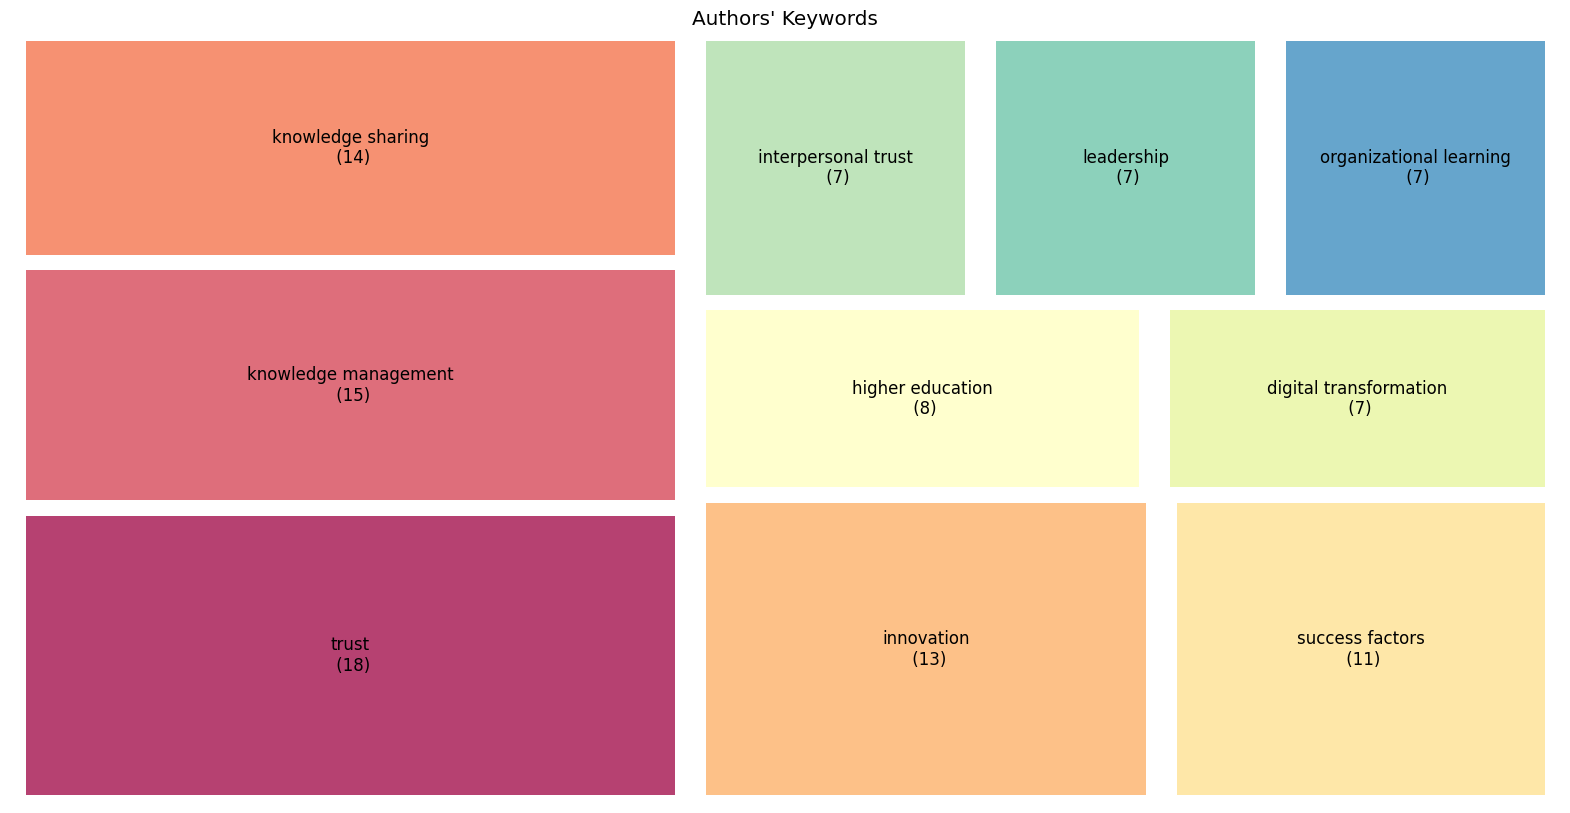

In [63]:
# Tree Map
# Arguments: entry         = 'kwp', 'kwa', 'aut', 'jou', 'ctr', or 'inst';
#            topn          = Total number entities
#            txt_font_size = Font size of the text inside the bins;
bibfile.tree_map(entry = 'kwa', topn = 10, size_x = 20, size_y = 10, txt_font_size = 12)

In [ ]:
# Authors Productivity Plot (An interactive plot). It informs for each year the documents (IDs) published for each author
# Arguments: view = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            topn = Total number entities
bibfile.authors_productivity(view = 'notebook', topn = 20)

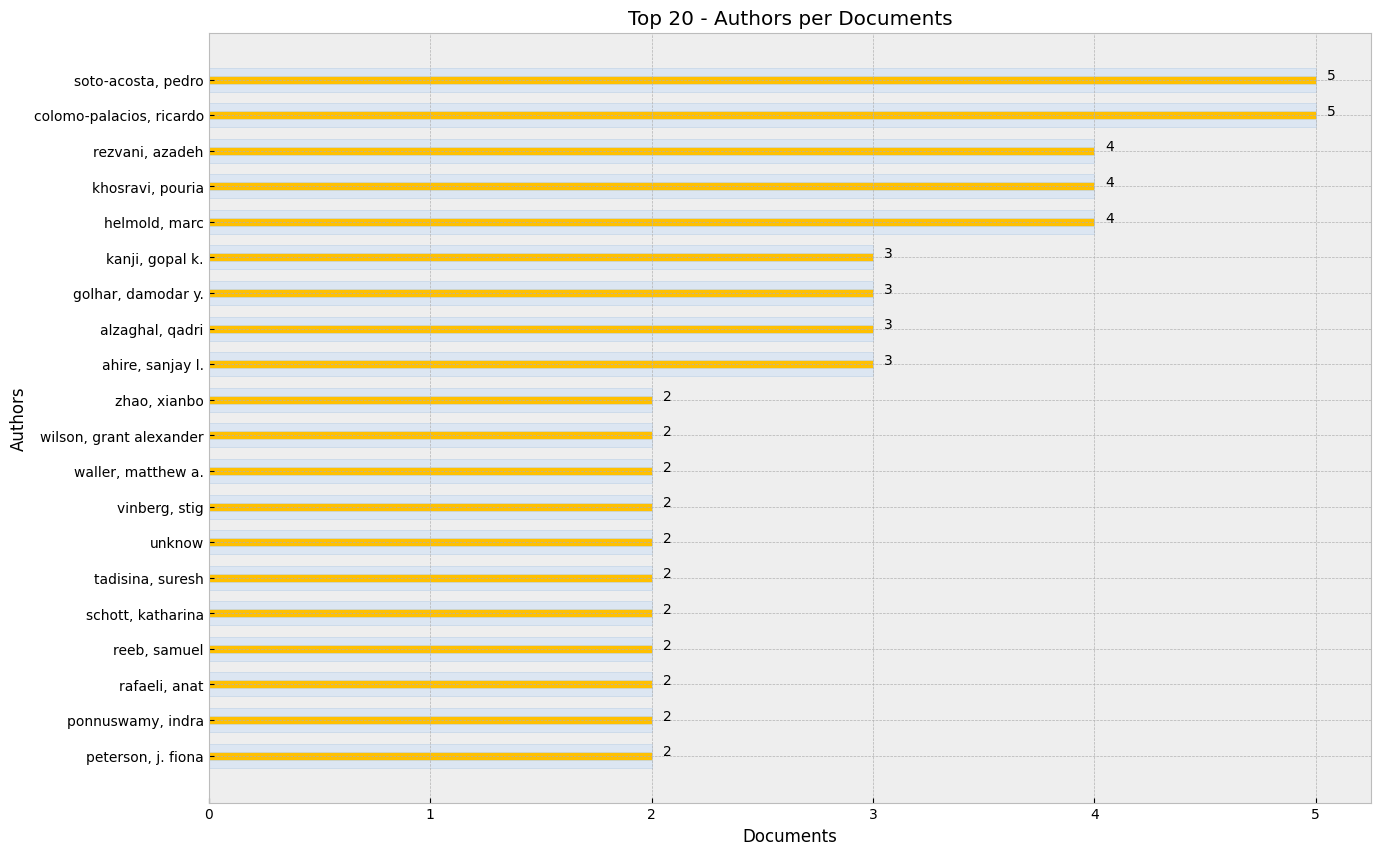

In [ ]:
# Bar Plots
# Arguments: statistic = 'dpy', 'cpy', 'ppy', 'ltk', 'spd', 'spc', 'apd', 'apc', 'aph', 'bdf_1', 'bdf_2', 'bdf_3', 'ipd', 'ipc', 'cpd', 'cpc', 'lpd', 'kpd', 'kad'
#                        'dpy' = Documents per Year
#                         cpy' = Citations per Year
#                        'ppy' = Past Citations per Year
#                        'ltk' = Lotka's Law
#                        'spd' = Sources per Documents
#                        'spc' = Sources per Citations
#                        'apd' = Authors per Documents
#                        'apc' = Authors per Citations
#                        'aph' = Authors per H-Index
#                        'bdf_1', 'bdf_2', 'bdf_3' = Bradford's Law - Core Sources 1, 2 or 3
#                        'ipd' = Institutions per Documents
#                        'ipc' = Institutions per Citations
#                        'cpd' = Countries per Documents
#                        'cpc' = Countries per Citations
#                        'lpd' = Language per Documents
#                        'kpd' = Keywords Plus per Documents
#                        'kad' = Authors' Keywords per Documents
#            topn      = Total number entities
bibfile.plot_bars(statistic = 'apd', topn = 20, size_x = 15, size_y = 10)

In [ ]:
#table of the above
data_bp = bibfile.ask_gpt_bp
print(tabulate(data_bp, tablefmt = 'psql'))

+----+--------------------------+---+
|  0 | soto-acosta, pedro       | 5 |
|  1 | colomo-palacios, ricardo | 5 |
|  2 | rezvani, azadeh          | 4 |
|  3 | khosravi, pouria         | 4 |
|  4 | helmold, marc            | 4 |
|  5 | kanji, gopal k.          | 3 |
|  6 | golhar, damodar y.       | 3 |
|  7 | alzaghal, qadri          | 3 |
|  8 | ahire, sanjay l.         | 3 |
|  9 | zhao, xianbo             | 2 |
| 10 | wilson, grant alexander  | 2 |
| 11 | waller, matthew a.       | 2 |
| 12 | vinberg, stig            | 2 |
| 13 | unknow                   | 2 |
| 14 | tadisina, suresh         | 2 |
| 15 | schott, katharina        | 2 |
| 16 | reeb, samuel             | 2 |
| 17 | rafaeli, anat            | 2 |
| 18 | ponnuswamy, indra        | 2 |
| 19 | peterson, j. fiona       | 2 |
+----+--------------------------+---+


In [ ]:
# Network - Citation Analisys Between Documents (Blue Nodes) and Citations (Red Nodes).  (An interactive plot).
# Arguments: view        = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            min_count   = Relationship between nodes that have been cited at least x times;
#            node_labels = True or False (True -> The label IDs will be displayed, False -> Only the nodes will be displayed );
#            local_nodes = True or False (True -> Only the blue will be displayed, False -> Red and Blue nodes will be displayed)
bibfile.network_adj_dir(view = 'notebook', min_count = 0, node_labels = True, local_nodes = False)

# Note; in the export there is no detailed information about the citations

In [ ]:
# Network - Local Documents (Only Blue Nodes) Citation History. (An interactive plot).
# Arguments: view        = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            min_count   = Relationship between nodes that have connected at least x times;
#            node_size   = -1. (If node_size = -1 then the default value will be used. If node_size > 0 then this new value will be used);
#            node_labels = True or False (True -> The label IDs will be displayed, False -> Only the nodes will be displayed );
#            back        = A list of documents. It shows the documents cited by them direct and indirectly;
#            forward     = A list of documents. It shows the documents that cites them direct and indirectly
bibfile.network_hist(view = 'notebook', min_count = 0, node_size = -1, node_labels = True, back = [], forward = [])

In [82]:
# Network - Collaboration Analysis Between Authors, Countries, Intitutions Or Adjacency Analysis Between Authors' Keywords or Keywords Plus. (An interactive plot).
# Arguments: view        = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            adj_type    = 'aut', 'cout', 'inst', 'kwa', or 'kwp'
#            min_count   = Relationship between nodes that have connected at least x times;
#            node_labels = True or False (True -> The label IDs will be displayed, False -> Only the nodes will be displayed );
#            node_size   = -1. (If node_size = -1 then the default value will be used. If node_size > 0 then this new value will be used);
#            label_type  = 'id', 'name' (Only meaningfull if node_labels = True. 'id' -> The ID will be displayed; 'name' -> The name will be displayed);
#            centrality  = 'degree', 'load', 'betw', 'close', 'eigen', 'katz', 'harmonic', or None. Color nodes according to centrality criterion
#                          'degree'   = Degree Centrality
#                          'load'     = Load Centrality
#                          'betw'     = Betweenness Centrality
#                          'close'    = Closeness Centrality
#                          'eigen'    = Eigenvector Centrality
#                          'katz'     = Katz Centrality
#                          'harmonic' = Harmonic Centrality
#                           None      = The Community Algorithm, Girvan-Newman, will be used Instead of a Centrality Criterion
bibfile.network_adj(view = 'notebook', adj_type = 'aut', min_count = 3, node_labels = True, label_type = 'name', centrality = None)

# PS: If a centrality criterion is used then the values can be obtained by the following command:  bibfile.table_centr

In [ ]:
# Network - Similarity Analysis using coupling or cocitation methods. (An interactive plot).
# Arguments: view        = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            sim_type    = 'coup', 'cocit' ('coup' -> Coupling Method, 'cocit' -> Cocitation Method)
#            node_size   = -1. (If node_size = -1 then the default value will be used. If node_size > 0 then this new value will be used);
#            node_labels = True or False (True -> The label IDs will be displayed, False -> Only the nodes will be displayed );
#            cut_coup    = Cutoff value for Coupling Method. Only meaninfull if sim_type = 'coup';
#            cut_cocit   = Cutoff value for Cocitation Method. Only meaninfull if sim_type = 'cocit'
bibfile.network_sim(view = 'notebook', sim_type = 'cocit', node_size = -1, node_labels = True, cut_coup = 0.3, cut_cocit = 5)

In [ ]:
# Network - Collaboration Analysis Between Countries using a Map. (An interactive plot).
# Arguments: view        = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            connections = True or False (True -> Countries connections will be displayed, False -> Countries connections will not be displayed);
#            country_lst = Highlight the Connections Between a List of Countries
bibfile.network_adj_map(view = 'notebook', connections = True, country_lst = [])

In [ ]:
# NLP
# Arguments: corpus_type       = 'abs', 'title', 'kwa', or 'kwp';
#            stop_words        = A list of stopwords to clean the corpus. ['ar', 'bn', 'bg', 'cs', 'en', 'fi', 'fr', 'de', 'el', 'hi', 'he', 'hu', 'it', 'ja', 'ko',  'mr', 'fa', 'pl', 'pt-br', 'ro', 'ru', 'es', 'sv', 'sk', 'zh', 'th', 'uk'];
#                                'ar' = Arabic; 'bn' = Bengali; 'bg' = Bulgarian; 'cs' = Czech; 'en' = English; 'fi' = Finnish; 'fr' = French; 'de' = German; 'el' = Greek; 'he' = Hebrew;'hi' = Hindi; 'hu' = Hungarian; 'it' = Italian;
#                                'ja' = Japanese; 'ko' = Korean; 'mr' =  Marathi; 'fa' =  Persian; 'pl' =  Polish; 'pt-br' = Potuguese-Brazilian; 'ro' = Romanian; 'ru' = Russian; 'es' =  Spanish; 'sk' = Slovak; 'sv' = Swedish;
#                                'zh' = Chinese; 'th' = Thai; 'uk' = Ukrainian
#            rmv_custom_words  = A list of custom stopwords to clean the corpus;
bibfile.create_embeddings(stop_words = ['en'], rmv_custom_words = [], corpus_type = 'abs')
emb = bibfile.embds

In [ ]:
# NLP #-1 refers to all outliers and should typically be ignored.
# Arguments: stop_words        = A list of stopwords to clean the corpus. ['ar', 'bn', 'bg', 'cs', 'en', 'fi', 'fr', 'de', 'el', 'hi', 'he', 'hu', 'it', 'ja', 'ko',  'mr', 'fa', 'pl', 'pt-br', 'ro', 'ru', 'es', 'sv', 'sk', 'zh', 'th', 'uk'];
#                              'ar' = Arabic; 'bn' = Bengali; 'bg' = Bulgarian; 'cs' = Czech; 'en' = English; 'fi' = Finnish; 'fr' = French; 'de' = German; 'el' = Greek; 'he' = Hebrew;'hi' = Hindi; 'hu' = Hungarian; 'it' = Italian;
#                              'ja' = Japanese; 'ko' = Korean; 'mr' =  Marathi; 'fa' =  Persian; 'pl' =  Polish; 'pt-br' = Potuguese-Brazilian; 'ro' = Romanian; 'ru' = Russian; 'es' =  Spanish; 'sk' = Slovak; 'sv' = Swedish;
#                              'zh' = Chinese; 'th' = Thai; 'uk' = Ukrainianian;   'es' =  Spanish;  'sv' = Swedish
#            rmv_custom_words  = A list of custom stopwords to clean the corpus;
#            embeddings        = True or False. If True then word embeddings are used to create the topics
bibfile.topics_creation(stop_words = ['en'], rmv_custom_words = [], embeddings = False)

   Topic  Count                             Name  \
0      0    416  0_knowledge_research_study_work   
1      1     13                      1_unknow___   

                                      Representation  \
0  [knowledge, research, study, work, management,...   
1                         [unknow, , , , , , , , , ]   

                                 Representative_Docs  
0  [purpose purpose paper explore impact cultural...  
1                           [unknow, unknow, unknow]  


In [ ]:
# NLP
# Each document Topic
topics = bibfile.topics

In [ ]:
# NLP
# Each document Probability to belong a Topic
probs = bibfile.probs

In [ ]:
# NLP
# Arguments: view = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window)
bibfile.graph_topics_distribution(view = 'notebook')

In [ ]:
# NLP
# Arguments: view = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window)
bibfile.graph_topics(view = 'notebook')

In [ ]:
# NLP
bibfile.topics_representatives()

,Topic,Docs
0,0.0,216; 103; 253
1,1.0,13; 13; 13


In [ ]:
# NLP
similar_topics, similarity = bibfile.topic_model.find_topics('electre', top_n = 10)
for i in range(0, len(similar_topics)):
  print('Topic: ', similar_topics[i], 'Correlation: ', round(similarity[i], 3))

Topic:  1 Correlation:  0.203
Topic:  0 Correlation:  0.058
